# Analysis of Active Region Magnetograms
In this notebook, we'll take a look at a few HMI observations of ARs and assess their suitability for use in our study. We will also look at the corresponding AIA observations.

We will select a few ARs and then configure the geometries to be used by the various heating models later. In this way, we keep the geometry constant across the various heating models.

In [1]:
import os

import numpy as np
from sunpy.map import Map
from sunpy.net import vso
import astropy.units as u
import astropy.constants as const
import synthesizAR
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Declare the VSO search client. This is what we'll use to perform the queries for the HMI and AIA data.

In [2]:
client = vso.VSOClient()

## NOAA AR 1109

First, query the data

In [3]:
qr_hmi_1109 = client.query(
    vso.attrs.Time('2010/9/29 23:50:00','2010/9/29 23:55:00'),
    vso.attrs.Instrument('HMI'),
    vso.attrs.Physobs('LOS_magnetic_field')
)

In [4]:
qr_aia_1109 = client.query(
    vso.attrs.Time('2010/9/29 23:50:00','2010/9/29 23:51:00'),
    vso.attrs.Instrument('AIA'),
    vso.attrs.Wave(94*u.angstrom,131*u.angstrom)
)

In [5]:
results_hmi_1109 = client.get(qr_hmi_1109).wait()

In [6]:
results_aia_1109 = client.get(qr_aia_1109).wait()

In [9]:
hmi_result_1109 = results_hmi_1109[1]
#hmi_result_1109 = '/home/wtb2/sunpy/data/hmi_m_45s_2010_09_29_23_51_45_tai_magnetogram.0.fits'

In [10]:
aia_result_1109_131 = results_aia_1109[-1]
#aia_result_1109_131 = '/home/wtb2/sunpy/data/aia_lev1_131a_2010_09_29t23_50_57_62z_image_lev1.1.fits'
aia_result_1109_94 = results_aia_1109[-2]
#aia_result_1109_94 = '/home/wtb2/sunpy/data/aia_lev1_94a_2010_09_29t23_50_50_12z_image_lev1.1.fits'

Then look at the magnetogram

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/sunpy/image/transform.py:130: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)
/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


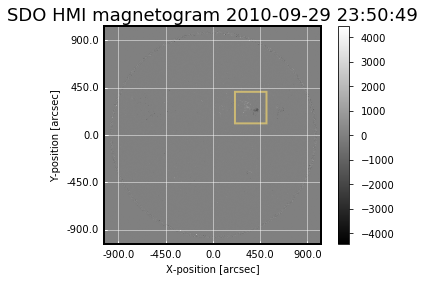

In [15]:
hmi_map = Map(hmi_result_1109).rotate()
hmi_map.peek()
hmi_map.draw_rectangle(u.Quantity([210,110]*u.arcsec),300*u.arcsec,300*u.arcsec,
                       lw=2,color=sns.color_palette('deep')[4])

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


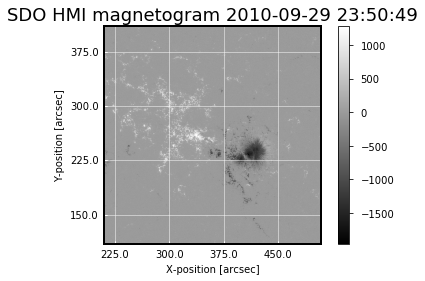

In [17]:
(hmi_map.submap(u.Quantity([210,510]*u.arcsec),
                u.Quantity([110,410]*u.arcsec))
        .peek())

And the corresponding AIA 131 Å and 94 Å images.

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


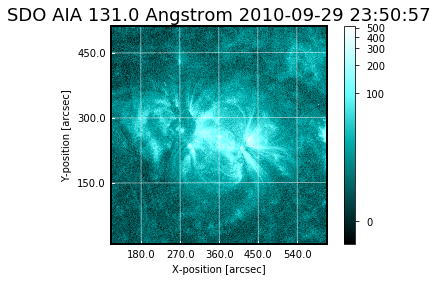

In [19]:
(Map(aia_result_1109_131)
    .submap(u.Quantity([110,610]*u.arcsec),
            u.Quantity([10,510]*u.arcsec))
    .peek())

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


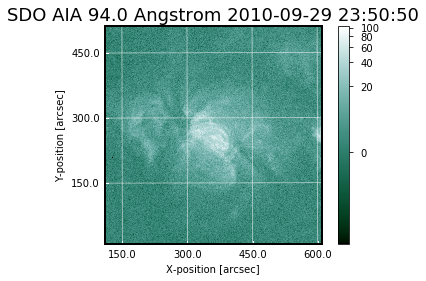

In [20]:
(Map(aia_result_1109_94)
    .submap(u.Quantity([110,610]*u.arcsec),
            u.Quantity([10,510]*u.arcsec))
    .peek())

Use `synthesizAR` to do a field extrapolation and look at distribution of loop lengths.

In [21]:
field_1109 = synthesizAR.Skeleton(hmi_fits_file=hmi_result_1109,
                                  crop=(u.Quantity([110,610]*u.arcsec),u.Quantity([10,510]*u.arcsec)),
                                  resample=u.Quantity([100,100]*u.pixel))

/home/wtb2/anaconda3/envs/systematic-ar-study/lib/python3.5/site-packages/sunpy/image/transform.py:130: RuntimeWarning: Setting NaNs to 0 for higher-order scikit-image rotation
  RuntimeWarning)


In [22]:
zshape=100
zrange=u.Quantity([0,500]*u.arcsec)

In [23]:
field_1109.extrapolate_field(zshape=zshape,zrange=zrange)

True


yt : [INFO     ] 2017-05-23 16:25:35,020 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-05-23 16:25:35,021 Parameters: domain_dimensions         = [96 96 96]
yt : [INFO     ] 2017-05-23 16:25:35,023 Parameters: domain_left_edge          = [  8.88147851e+09   1.66017386e+09   7.23009049e+08]
yt : [INFO     ] 2017-05-23 16:25:35,024 Parameters: domain_right_edge         = [  4.35656994e+10   3.67056887e+10   3.54274434e+10]
yt : [INFO     ] 2017-05-23 16:25:35,025 Parameters: cosmological_simulation   = 0.0


In [24]:
field_1109.extract_streamlines(1000,loop_length_range=[1e9,1e11]*u.cm)

yt : [INFO     ] 2017-05-23 16:27:28,612 AMRKDTree rebuilt, Final Volume: 4.218416e+31
Streamlining: 100%|██████████| 1000/1000 [00:01<00:00, 531.10it/s]
yt : [INFO     ] 2017-05-23 16:27:31,710 AMRKDTree rebuilt, Final Volume: 4.218416e+31
Streamlining: 100%|██████████| 149/149 [00:00<00:00, 496.79it/s]
yt : [INFO     ] 2017-05-23 16:27:32,441 AMRKDTree rebuilt, Final Volume: 4.218416e+31
Streamlining: 100%|██████████| 20/20 [00:00<00:00, 354.28it/s]
yt : [INFO     ] 2017-05-23 16:27:32,812 AMRKDTree rebuilt, Final Volume: 4.218416e+31
Streamlining: 100%|██████████| 3/3 [00:00<00:00, 153.35it/s]


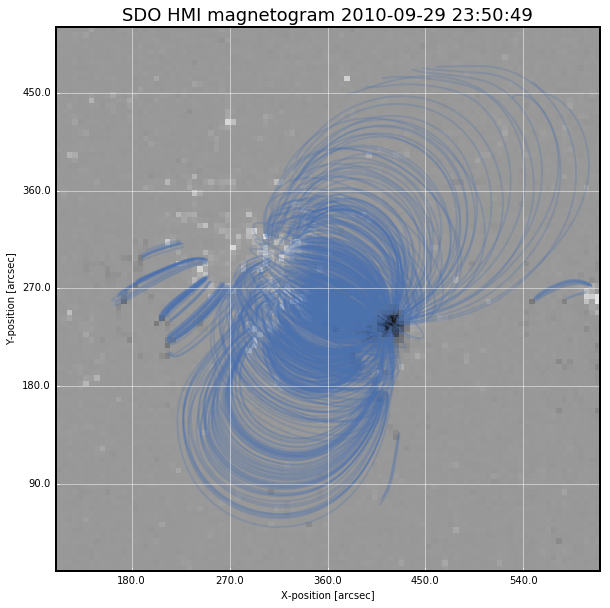

In [25]:
field_1109.peek(alpha=0.25)

Create the loop objects.

In [26]:
field_1109.make_loops()

(array([ 179.,  327.,  155.,   91.,   64.,   43.,   40.,   39.,   31.,   31.]),
 array([  1.08049051e+09,   4.44058178e+09,   7.80067305e+09,
          1.11607643e+10,   1.45208556e+10,   1.78809468e+10,
          2.12410381e+10,   2.46011294e+10,   2.79612206e+10,
          3.13213119e+10,   3.46814032e+10]),
 <a list of 10 Patch objects>)

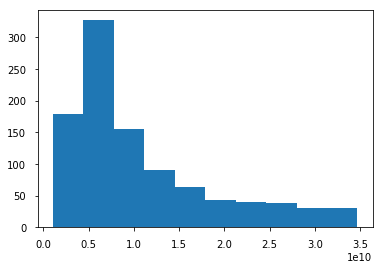

In [27]:
plt.hist([l.full_length.value for l in field_1109.loops])

Save this field so that it can be restored and used by other models. That way, multiple heating scenarios can easily be run on the same AR geometry.

In [28]:
field_1109.save(savedir='/data/datadrive1/ar_forward_modeling/systematic_ar_study/base_noaa1109')

## NOAA AR 1193
We'll hold off on running and saving this geometry for now. Can come back to it later.

In [ ]:
qr_hmi_1193 = client.query(
    vso.attrs.Time('2011/4/19 13:30:00','2011/4/19 13:35:00'),
    vso.attrs.Instrument('HMI'),
    vso.attrs.Physobs('LOS_magnetic_field')
)

In [ ]:
hmi_results_1193 = client.get(qr_hmi_1193).wait()

In [ ]:
hmi_result_1193 = '/home/wtb2/sunpy/data/hmi_m_45s_2011_04_19_13_32_15_tai_magnetogram.fits'

In [ ]:
qr_aia_1193 = client.query(
    vso.attrs.Time('2011/4/19 13:32:20','2011/4/19 13:32:40'),
    vso.attrs.Instrument('AIA'),
    vso.attrs.Wave(94*u.angstrom,131*u.angstrom)
)

In [ ]:
aia_results_1193 = client.get(qr_aia_1193).wait()

In [ ]:
aia_result_1193_94 = '/home/wtb2/sunpy/data/aia_lev1_94a_2011_04_19t13_32_38_12z_image_lev1.fits'
aia_result_1193_131 = '/home/wtb2/sunpy/data/aia_lev1_131a_2011_04_19t13_32_33_62z_image_lev1.fits'

In [ ]:
hmi_map = Map(hmi_result_1193).rotate()
hmi_map.peek()
hmi_map.draw_rectangle(u.Quantity([-110,210]*u.arcsec),300*u.arcsec,300*u.arcsec,
                       lw=2,color=sns.color_palette('deep')[4])

In [ ]:
(hmi_map.submap(u.Quantity([-110,190]*u.arcsec),
                u.Quantity([210,510]*u.arcsec))
        .peek())

In [ ]:
(Map(aia_result_1193_131)
    .submap(u.Quantity([-110,190]*u.arcsec),
            u.Quantity([210,510]*u.arcsec))
    .peek())

In [ ]:
(Map(aia_result_1193_94)
    .submap(u.Quantity([-110,190]*u.arcsec),
            u.Quantity([210,510]*u.arcsec))
    .peek())

In [ ]:
field_1193 = synthesizAR.Skeleton(hmi_fits_file=hmi_result_1193,
                                  crop=(u.Quantity([-210,290]*u.arcsec),u.Quantity([110,610]*u.arcsec)),
                                  resample=u.Quantity([100,100]*u.pixel))

In [ ]:
zshape=100
zrange=u.Quantity([0,500]*u.arcsec)

In [ ]:
field_1193.extrapolate_field(zshape,zrange)

In [ ]:
field_1193.extract_streamlines(1000,loop_length_range=[1e9,1e11]*u.cm)

In [ ]:
field_1193.peek(alpha=0.25)

In [ ]:
field_1193.make_loops()

In [ ]:
plt.hist([l.full_length.value for l in field_1193.loops])
#plt.xscale('log')
plt.yscale('log')

In [ ]:
field_1193.save(savedir='/data/datadrive1/ar_forward_modeling/systematic_ar_study/base_noaa1193/')